In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from discrete_basics import *
from discrete_plot import *
from discrete_sim import *
from scipy.integrate import solve_ivp
from cycler import cycler

plt.rcParams['axes.prop_cycle']=cycler('color',['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
mpl.rcParams['backend'] = 'pdf'
mpl.rc('font',**{'family':'serif'})
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb,amsmath,wasysym}')
plt.rcParams['font.size'] = 16

# 13 a

5 1.0 0.5986009507240708 -1.0490291627575965


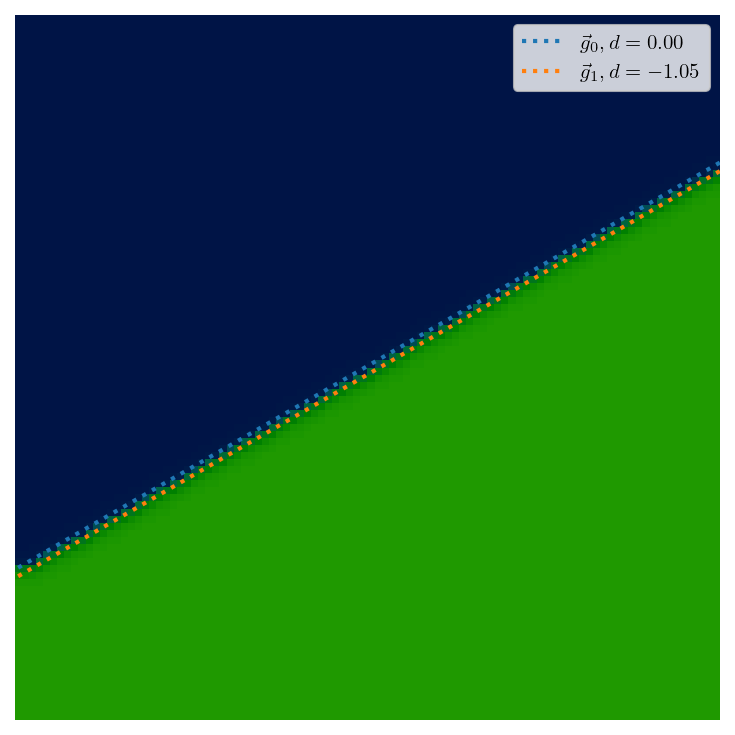

5 5.0 0.7239118443199639 -3.8134683326163556


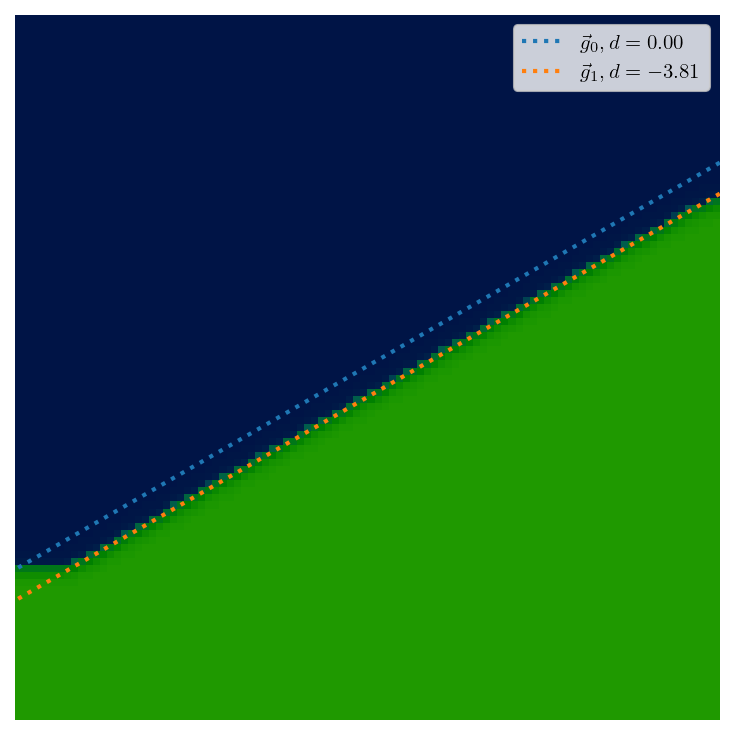

15 1.0 1.0435272468847845 -4.5399838539707575


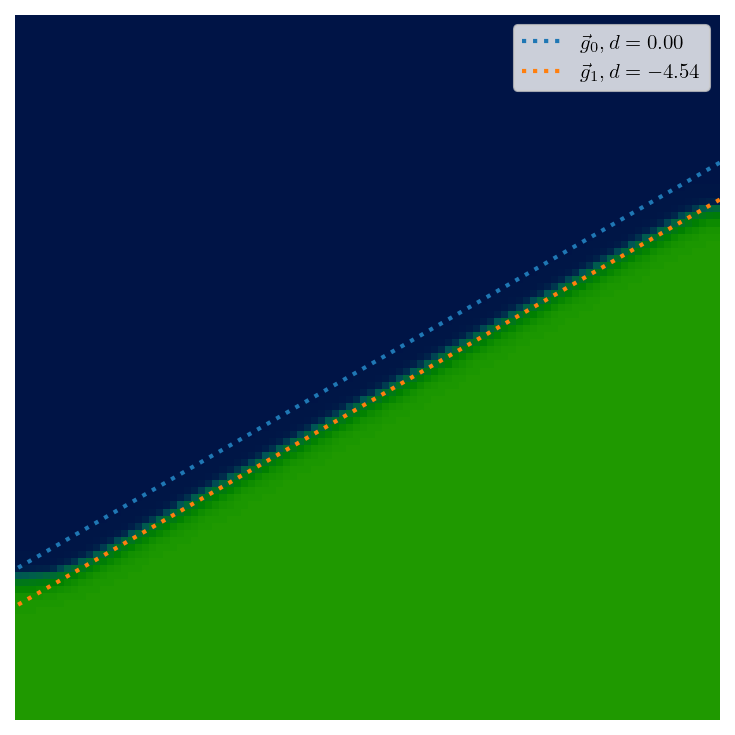

15 5.0 1.860811157673276 -20.578838357672705


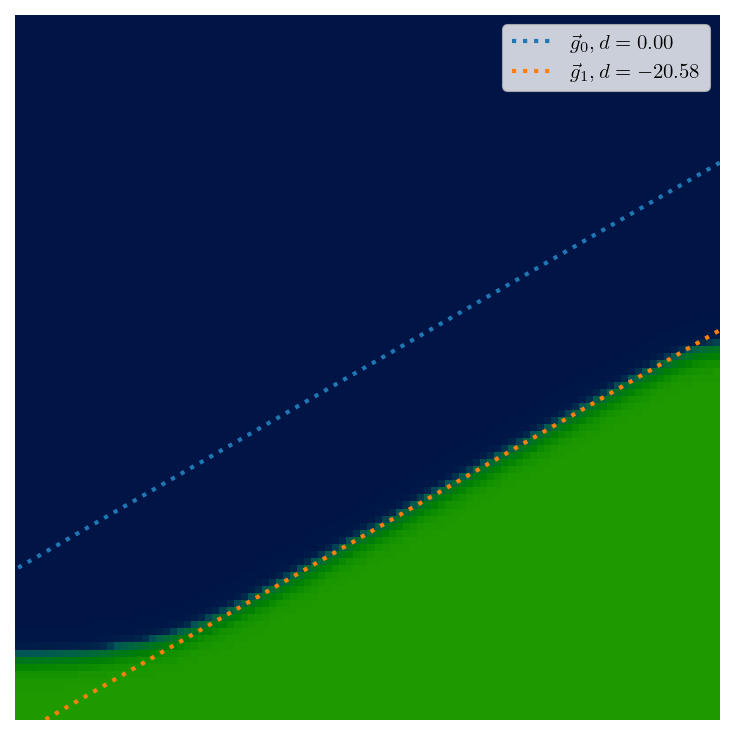

In [4]:
a,b,c,d = -10, 2, 15, -5
solutions = minima(a,b,c,d)
resolution = 100
res, xv, yv = mesh_reg(resolution)
dx = 1.0
phi = 30
ini = (0,1)
tol = 0.1

z = inistripe(xv,yv,resolution,phi,solutions[ini[0]],solutions[ini[1]])
for coup in [5,15]:
    diff = coup*dx**2
    z1 = z.flatten()
    timeplus=0
    for tlimit in [(1,0.001),(5,0.01)]:
        tstep = tlimit[1]
        t = 0
        while (t*tstep+timeplus)<tlimit[0]:
            try:
                reso = solve_ivp(rhs_reg,[0,tstep],z1,'LSODA',args=((a,b,c,d,diff,dx,res),))
                z1 = reso.y[:,-1]
                t = t+1
            except(MemoryError):
                fig, ax = plt.subplots(1,1,figsize = (1,1))
                plt.close()
        timeplus = timeplus+t*tstep
        fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=150)
        ax.add_collection(patches_reg(xv,yv,z1))
        
        m = resolution*np.array([np.cos(np.deg2rad(phi)),np.sin(np.deg2rad(phi))]) #directional vector
        a0 = np.array([50, 50]) #point on fitline, dev=0==ini
        ax.plot(np.vstack((a0-m,a0+m))[:,0], np.vstack((a0-m,a0+m))[:,1],ls='dotted',lw=2,label=r"$\vec{{g}}_0, d = {:.2f}$".format(0))
        
        mask = np.array(np.abs(z1-solutions[ini[0]])>tol) * np.array(np.abs(z1-solutions[ini[1]])>tol) #all points in front
        error, distance = vecfitter(xv.flatten()[mask],yv.flatten()[mask],phi)
        print(coup,timeplus,error/np.sum(mask),distance)
        a1 = np.array([50+distance*np.cos(np.deg2rad(phi+90)), 50+distance*np.sin(np.deg2rad(phi+90))]) #point on fitline, dev=0==ini
        ax.plot(np.vstack((a1-m,a1+m))[:,0], np.vstack((a1-m,a1+m))[:,1],ls='dotted',lw=2,label=r"$\vec{{g}}_1, d = {:.2f}$".format(distance))    #, tol $= {}$".format(distance, lim))
#        ax.axis('equal');
        ax.set_xlim(-.5,99.5)
        ax.set_ylim(-.5,99.5)
        ax.axis('off')
        plt.legend()
        plt.tight_layout()
        fig.savefig("13_reg{}_30u02^^_{}_{}_c{:.2f}_d{}_D{}_dx{}_t{:.3f}s.pdf".format(resolution,a,b,c,d,diff,dx,tlimit[0]))
        plt.show()